In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from PIL import Image
from collections import Counter
from glob import glob
from tensorflow.keras.utils import plot_model

---
### Loading The Data

In [15]:
train_path = 'fruits-360_dataset/fruits-360/Training/'
test_path = 'fruits-360_dataset/fruits-360/Test/'

---
# Dataset Overview

**Title:** Fruit and Vegetable Image Recognition  
**Source:** [Kaggle Fruits- 360 Dataset](https://www.kaggle.com/datasets/moltean/fruits)  



**Dataset Characteristics:**
- Total number of images: 90,483
- Number of classes: 131
- Image dimensions: 100x100 pixels
- Training set size: 67,692 images
- Test set size: 22,688 images


*Credit for base CNN*: https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

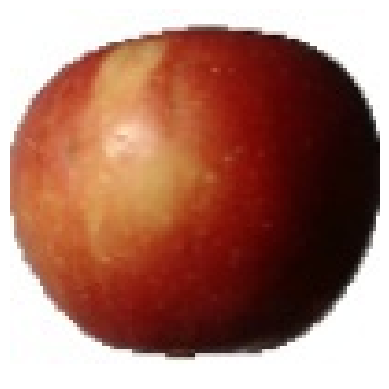

(100, 100, 3)


In [16]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

x = img_to_array(img)
print(x.shape)

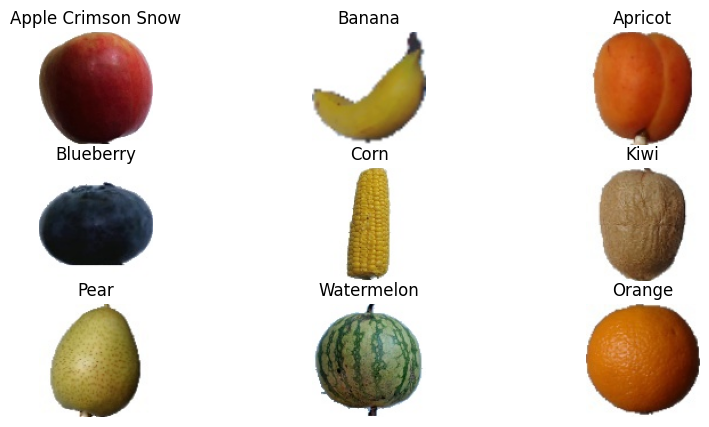

In [17]:
images = ['Apple Crimson Snow', 'Banana', 'Apricot', 'Blueberry', 'Corn', 'Kiwi', 'Pear', 'Watermelon', 'Orange']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [18]:
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)


newData = Counter(fruits)
frequent_fruits = newData.most_common(20)
print("Top 20 frequent Fruits:")
frequent_fruits

Top 20 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735),
 ('Pear Stone', 711),
 ('Cauliflower', 702),
 ('Fig', 702),
 ('Pear Forelle', 702),
 ('Pepper Orange', 702),
 ('Pear 2', 696),
 ('Tomato Heart', 684),
 ('Apple Red Yellow 2', 672),
 ('Tomato 2', 672),
 ('Pear Red', 666)]

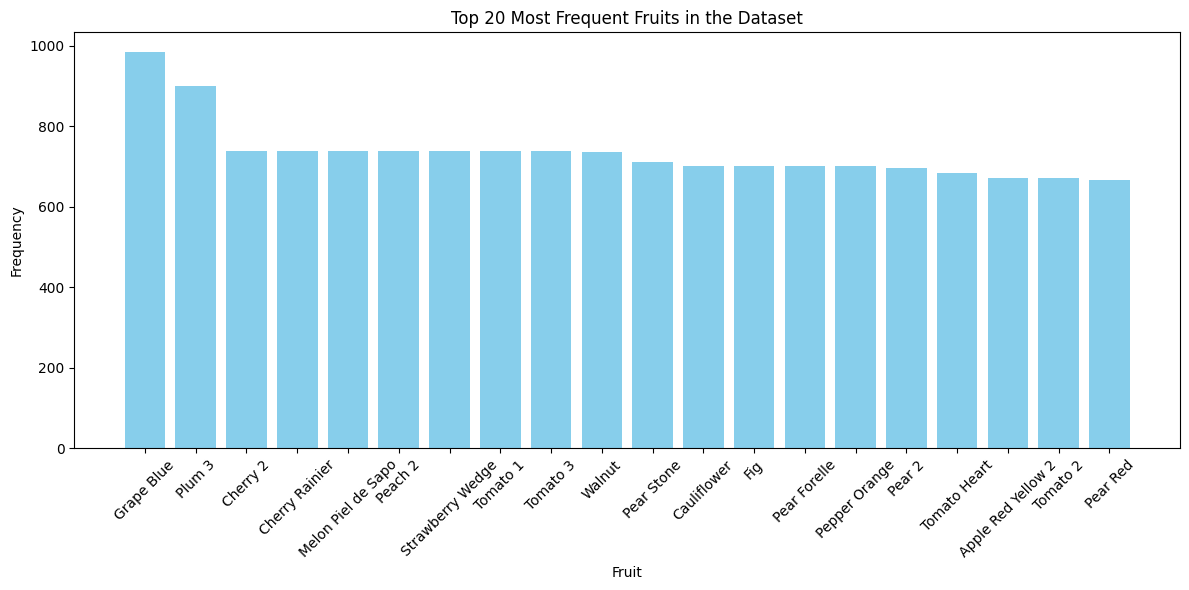

In [19]:
fruit_names = [fruit[0] for fruit in frequent_fruits]
fruit_counts = [fruit[1] for fruit in frequent_fruits]

plt.figure(figsize=(12, 6))
plt.bar(fruit_names, fruit_counts, color='skyblue')
plt.xlabel('Fruit')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Fruits in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- 
# Model

In [28]:
className = glob(train_path + '/*')
number_of_class = len(className)

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

In [22]:
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     6,554,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 131)            │       134,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 131)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,717,539 (25.63 MB)

 Trainable params: 6,717,539 (25.63 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
epochs = 100
batch_size = 64

---
**Augmented Data**

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    horizontal_flip=True
    zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size= x.shape[:2],
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size= x.shape[:2],
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical"
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


---
**Fitting the model**

In [31]:
hist = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)

Epoch 1/100


c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0155 - loss: 4.9032 - val_accuracy: 0.0339 - val_loss: 4.6321
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 896ms/step - accuracy: 0.0357 - loss: 4.5676 - val_accuracy: 0.0911 - val_loss: 3.8680
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 816ms/step - accuracy: 0.0756 - loss: 3.9581 - val_accuracy: 0.1536 - val_loss: 3.3425
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 645ms/step - accuracy: 0.1032 - loss: 3.6045 - val_accuracy: 0.2148 - val_loss: 2.9657
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - accuracy: 0.1923 - loss: 3.1241 - val_accuracy: 0.2917 - val_loss: 2.6141
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 787ms/step - accuracy: 0.2547 - loss: 2.7536 - val_accuracy: 0.4583 - val_loss: 2.1070
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 668ms/step - accuracy: 0.2606 - loss: 2.6075 - val_accuracy: 0.5560 - val_loss: 1.7412
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 663ms/step - accuracy: 0.3575 - loss: 2.1925 - val_accuracy: 0

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 634ms/step - accuracy: 0.8224 - loss: 0.5218 - val_accuracy: 0.8854 - val_loss: 0.3928
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 559ms/step - accuracy: 0.8543 - loss: 0.4470 - val_accuracy: 0.9115 - val_loss: 0.3055
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - accuracy: 0.8776 - loss: 0.3978 - val_accuracy: 0.8958 - val_loss: 0.3904
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 543ms/step - accuracy: 0.8724 - loss: 0.4136 - val_accuracy: 0.9036 - val_loss: 0.3497
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 615ms/step - accuracy: 0.8716 - loss: 0.3837 - val_accuracy: 0.9271 - val_loss: 0.2213
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 627ms/step - accuracy: 0.8747 - loss: 0.3846 - val_accuracy: 0.9336 - val_loss: 0.2214
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 608ms/step - accuracy: 0.8872 - loss: 0.3367 - val_accuracy: 0.8763 - val_loss: 0.3846
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 580ms/step - accuracy: 0.8426 - loss: 0.4743 - val_a

---
**Evaluation**

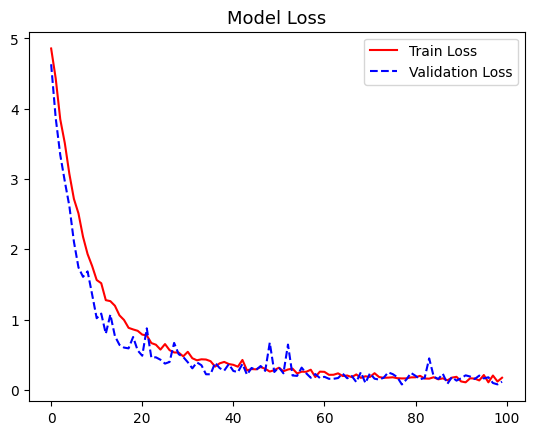

In [32]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "red")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss",  size = 13)
plt.legend()
plt.show()

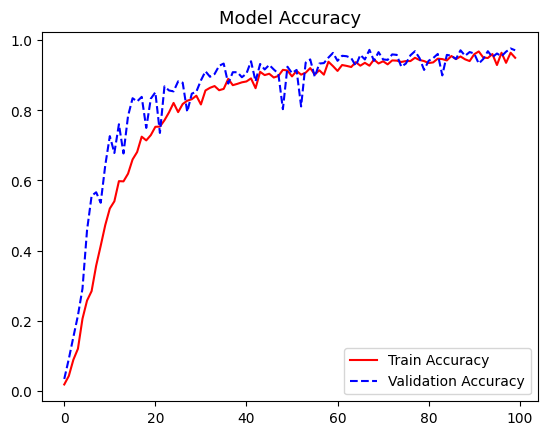

In [33]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "red")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", size = 13)
plt.legend()
plt.show()

In [34]:
loss, accuracy = model.evaluate(test_generator, steps=800 // batch_size)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9542 - loss: 0.1452
Test Loss: 0.14572185277938843
Test Accuracy: 0.96484375


---
**Testing**

In [40]:
def load_and_preprocess_image(filename):
    np_image = Image.open(filename)  
    np_image = np_image.resize((100, 100))  
    np_image = np.array(np_image).astype('float32') / 255  
    np_image = np.expand_dims(np_image, axis=0)  
    return np_image


In [41]:
image = load_and_preprocess_image(test_path + "/Mango/0_100.jpg")

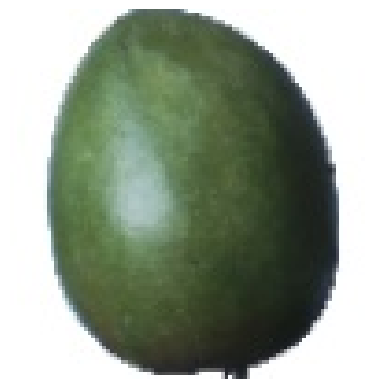

In [42]:
plt.imshow(np.squeeze(image)) 
plt.axis("off")
plt.show()

In [43]:
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=-1)
print("Predicted class index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class index: [64]


In [44]:
class_indices = test_generator.class_indices
predicted_class_label = [label for label, index in class_indices.items() if index == 64]
print("Predicted class label:", predicted_class_label)

Predicted class label: ['Mango']


---

In [45]:
img_path = 'fruits-360_dataset/fruits-360/test-multiple_fruits/Bananas(lady_finger)1.jpg'
preprocessed_image = load_and_preprocess_image(img_path)

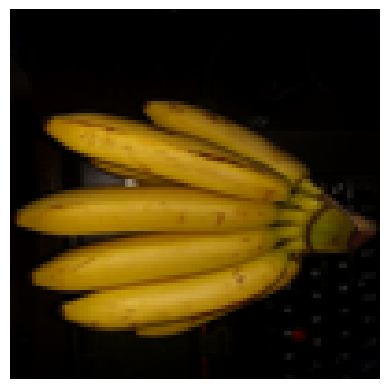

In [46]:
plt.imshow(np.squeeze(preprocessed_image), interpolation='nearest')
plt.axis('off')
plt.show()

In [47]:
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=-1)
print("Predicted class index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class index: [26]


In [48]:
predicted_class_label = [label for label, index in class_indices.items() if index == 17]
print("Predicted class label:", predicted_class_label)

Predicted class label: ['Banana Lady Finger']


---

In [55]:
img_path = 'fruits-360_dataset/fruits-360/test-multiple_fruits/grape_pear_mandarine.jpg'
preprocessed_image = load_and_preprocess_image(img_path)

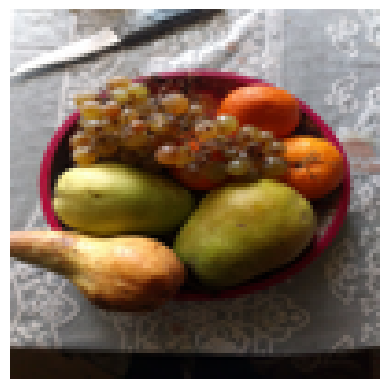

In [56]:
plt.imshow(np.squeeze(preprocessed_image), interpolation='nearest')
plt.axis('off')
plt.show()

In [57]:
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=-1)
print("Predicted class index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class index: [37]


In [58]:
predicted_class_label = [label for label, index in class_indices.items() if index == 116]
print("Predicted class label:", predicted_class_label)

Predicted class label: ['Strawberry']


----
**Model Evaluation**

Based off what we see from the Model evaluation visualizations and training loss and decreases really quickly with the exact opposite effect for the Model Accuracy. By prinint out the loss and accuracy we can get a better understanding of the loss and accuracy of the model which the Test Loss: 0.25146737694740295 and the Test Accurac is 0.9244791865348816. From testing multiple images above we can see a succsuss rate with individual images like the mango but with testing multiple images it geta s little confusing when working with images that have multiple differnt fruit (like the grap, pears, and mandarines). However it picks up on multiple of the same fruit fairly well(Banana Lady Finger).

---


# Alt Models

In [59]:
input_shape = x.shape 

In [60]:
# Batch Normalization Model
def create_bn_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=input_shape),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(128, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(number_of_class, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Adjusted Learning Rate and Additional Dropout
def create_lr_dropout_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(),
        Dropout(0.3), 
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(),
        Dropout(0.3),  
        Conv2D(128, (3, 3)),
        Activation('relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(number_of_class, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.0005)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [61]:
bn_model = create_bn_model()
lr_dropout_model = create_lr_dropout_model()

In [62]:
print("\nBatch Normalization Model Summary:")
bn_model.summary()
print("\nLearning Rate and Dropout Model Summary:")
lr_dropout_model.summary()


Batch Normalization Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 131)            │       134,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,336,643 (50.88 MB)

 Trainable params: 13,336,195 (50.87 MB)

 Non-trainable params: 448 (1.75 KB)


Learning Rate and Dropout Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 131)            │       134,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,335,747 (50.87 MB)

 Trainable params: 13,335,747 (50.87 MB)

 Non-trainable params: 0 (0.00 B)

---

In [69]:
checkpoint_bn = ModelCheckpoint('best_model_bn.keras', monitor='val_accuracy', mode='max', save_best_only=True)
early_stop_bn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint_lr_dropout = ModelCheckpoint('best_model_lr_dropout.keras', monitor='val_accuracy', mode='max', save_best_only=True)
early_stop_lr_dropout = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [70]:
# Train the Batch Normalization Model
history_bn = bn_model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=800 // batch_size,
    callbacks=[checkpoint_bn, early_stop_bn]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.0780 - loss: 7.2950 - val_accuracy: 0.0065 - val_loss: 9.3268
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1544 - loss: 5.2696 - val_accuracy: 0.0143 - val_loss: 9.5143
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2160 - loss: 4.2411 - val_accuracy: 0.0104 - val_loss: 10.5254
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2858 - loss: 3.7232 - val_accuracy: 0.0052 - val_loss: 13.9616
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3263 - loss: 3.2050 - val_accuracy: 0.0065 - val_loss: 18.7386
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3549 - loss: 3.1484 - val_accuracy: 0.0065 - val_loss: 16.0833
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 906ms/step - accuracy: 0.4018 - loss: 2.7747 - val_accuracy: 0.0117 - val_loss: 17.9076
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 960ms/step - accuracy: 0.4551 - loss: 2.5361 - val_accuracy:

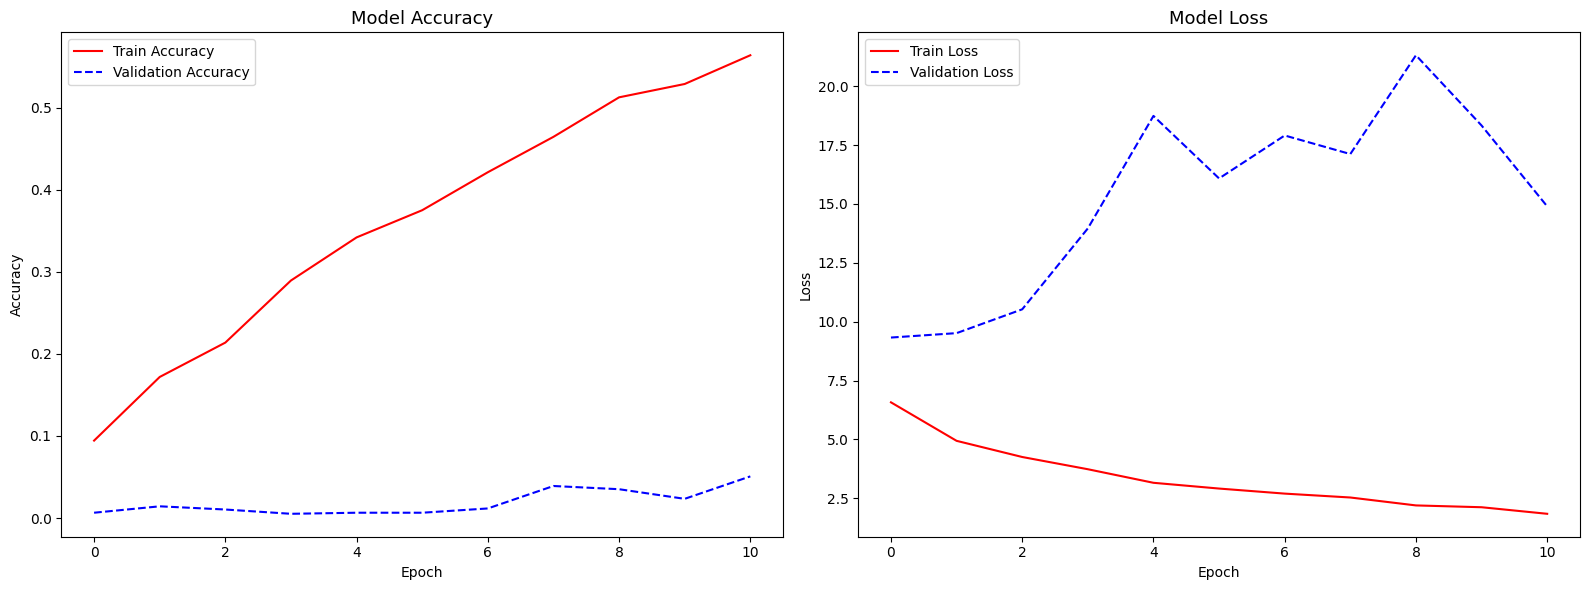

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].plot(history_bn.history['accuracy'], label='Train Accuracy', color='red')
axs[0].plot(history_bn.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='dashed', markeredgecolor='purple', markeredgewidth=2)
axs[0].set_title('Model Accuracy', size=13)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history_bn.history['loss'], label='Train Loss', color='red')
axs[1].plot(history_bn.history['val_loss'], label='Validation Loss', color='blue', linestyle='dashed', markeredgecolor='purple', markeredgewidth=2)
axs[1].set_title('Model Loss', size=13)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()



In [72]:
final_train_accuracy = history_bn.history['accuracy'][-1]
final_val_accuracy = history_bn.history['val_accuracy'][-1]
final_train_loss = history_bn.history['loss'][-1]
final_val_loss = history_bn.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


bn_loss, bn_accuracy = bn_model.evaluate(test_generator, steps=800 // batch_size)
print("Batch Normalization Model - Test Loss:", bn_loss)
print("Batch Normalization Model - Test Accuracy:", bn_accuracy)

Final Training Accuracy: 0.5638
Final Validation Accuracy: 0.0508
Final Training Loss: 1.8425
Final Validation Loss: 14.8973
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.0069 - loss: 9.1953
Batch Normalization Model - Test Loss: 9.354384422302246
Batch Normalization Model - Test Accuracy: 0.0065104165114462376


In [73]:
# Train the Learning Rate and Dropout Model
history_lr_dropout = lr_dropout_model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=800 // batch_size,
    callbacks=[checkpoint_lr_dropout, early_stop_lr_dropout]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 729ms/step - accuracy: 0.4360 - loss: 1.8765 - val_accuracy: 0.6979 - val_loss: 1.4491
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 657ms/step - accuracy: 0.4629 - loss: 1.7675 - val_accuracy: 0.6576 - val_loss: 1.3786
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 633ms/step - accuracy: 0.4831 - loss: 1.6620 - val_accuracy: 0.7109 - val_loss: 1.1578
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 597ms/step - accuracy: 0.5676 - loss: 1.4479 - val_accuracy: 0.7474 - val_loss: 1.1082
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 598ms/step - accuracy: 0.5992 - loss: 1.2889 - val_accuracy: 0.7448 - val_loss: 0.9857
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 627ms/step - accuracy: 0.6163 - loss: 1.2194 - val_accuracy: 0.7578 - val_loss: 1.0530
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 621ms/step - accuracy: 0.6190 - loss: 1.1668 - val_accuracy: 0.7617 - val_loss: 0.8701
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 633ms/step - accuracy: 0.6818 - loss: 1.0526 - 

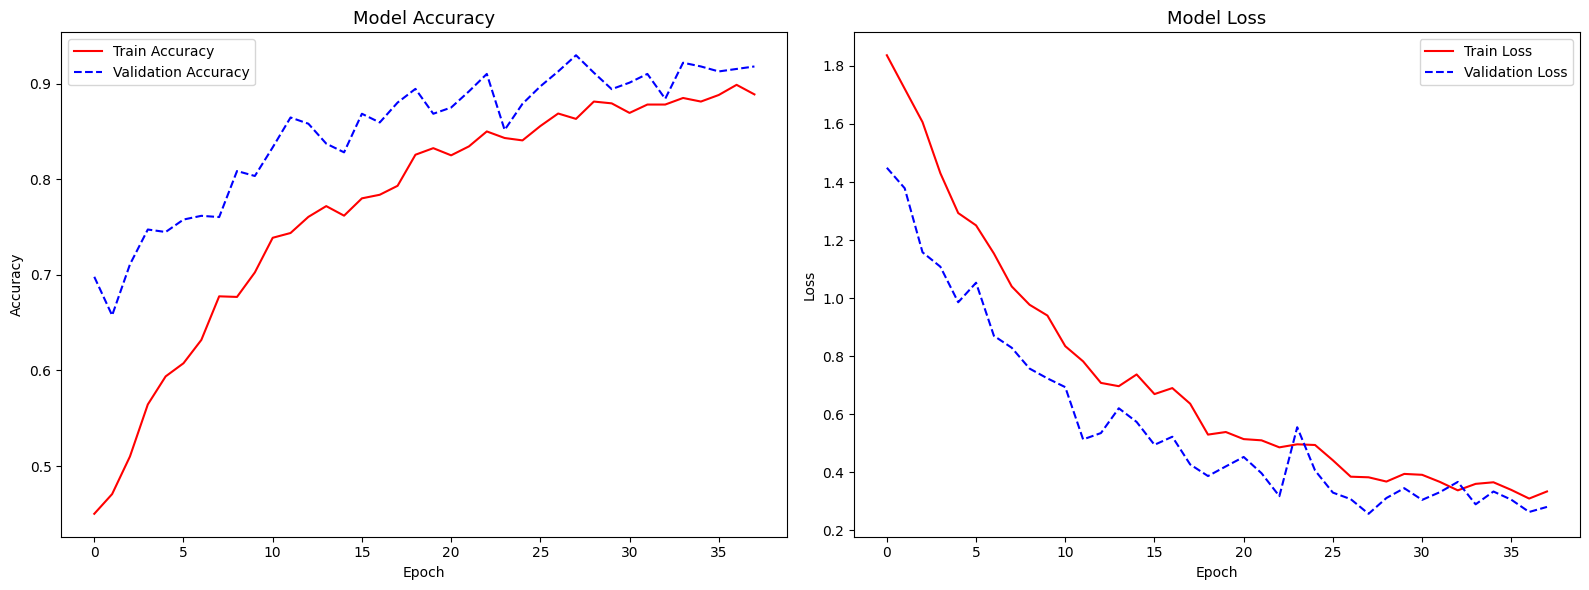

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].plot(history_lr_dropout.history['accuracy'], label='Train Accuracy', color='red')
axs[0].plot(history_lr_dropout.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='dashed', markeredgecolor='purple', markeredgewidth=2)
axs[0].set_title('Model Accuracy', size=13)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history_lr_dropout.history['loss'], label='Train Loss', color='red')
axs[1].plot(history_lr_dropout.history['val_loss'], label='Validation Loss', color='blue', linestyle='dashed', markeredgecolor='purple', markeredgewidth=2)
axs[1].set_title('Model Loss', size=13)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [75]:
final_train_accuracy = history_lr_dropout.history['accuracy'][-1]
final_val_accuracy = history_lr_dropout.history['val_accuracy'][-1]
final_train_loss = history_lr_dropout.history['loss'][-1]
final_val_loss = history_lr_dropout.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

lr_dropout_loss, lr_dropout_accuracy = lr_dropout_model.evaluate(test_generator, steps=800 // batch_size)
print("Learning Rate and Dropout Model - Test Loss:", lr_dropout_loss)
print("Learning Rate and Dropout Model - Test Accuracy:", lr_dropout_accuracy)

Final Training Accuracy: 0.8888
Final Validation Accuracy: 0.9180
Final Training Loss: 0.3339
Final Validation Loss: 0.2806
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9161 - loss: 0.3143
Learning Rate and Dropout Model - Test Loss: 0.31704944372177124
Learning Rate and Dropout Model - Test Accuracy: 0.91015625


---
*Testing*

In [76]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(100, 100))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [77]:
def get_class_label(class_index, class_indices):
    labels = dict((v,k) for k,v in class_indices.items())
    return labels[class_index]

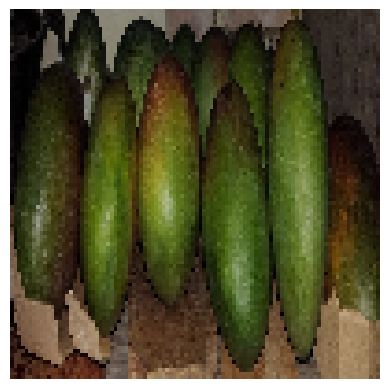

In [78]:
img_path = 'fruits-360_dataset/fruits-360/test-multiple_fruits/mangos1.jpg'
preprocessed_image = load_and_preprocess_image(img_path)
plt.imshow(np.squeeze(preprocessed_image))
plt.axis('off')
plt.show()

In [79]:
prediction = lr_dropout_model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction, axis=-1)[0]
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class index: 14


In [80]:
predicted_class_label = get_class_label(predicted_class_index, train_generator.class_indices)
print("Predicted class label:", predicted_class_label)

Predicted class label: Avocado


---

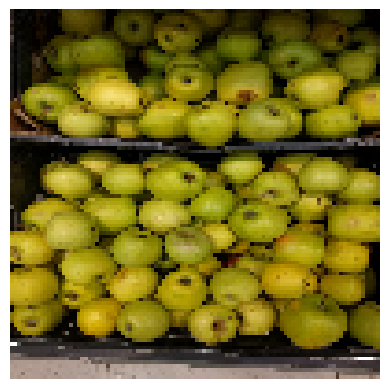

In [81]:
img_path = 'fruits-360_dataset/fruits-360/test-multiple_fruits/apple.jpg'
preprocessed_image = load_and_preprocess_image(img_path)
plt.imshow(np.squeeze(preprocessed_image))
plt.axis('off')
plt.show()

In [82]:
prediction = lr_dropout_model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction, axis=-1)[0]
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class index: 12


In [83]:
predicted_class_label = get_class_label(predicted_class_index, train_generator.class_indices)
print("Predicted class label:", predicted_class_label)

Predicted class label: Apple Red Yellow 2


---

In [84]:
image = test_path + "/Beetroot/23_100.jpg"

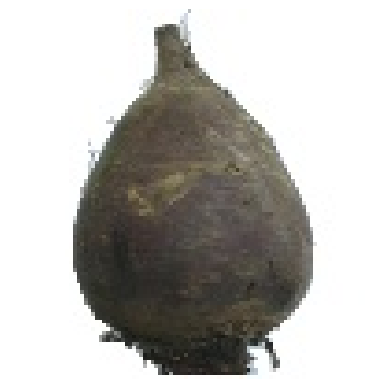

In [85]:
preprocessed_image = load_and_preprocess_image(image)
plt.imshow(np.squeeze(preprocessed_image))
plt.axis('off')
plt.show()

In [86]:
prediction = lr_dropout_model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction, axis=-1)[0]
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class index: 19


In [87]:
predicted_class_label = get_class_label(predicted_class_index, train_generator.class_indices)
print("Predicted class label:", predicted_class_label)

Predicted class label: Beetroot


---

Own test pics (for fun)

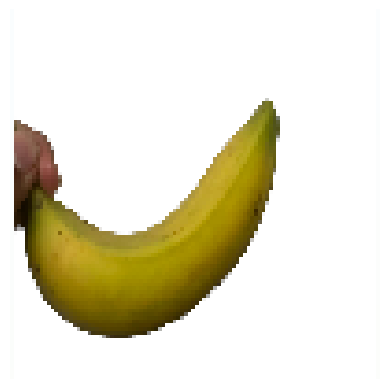

In [90]:
image=  "Adam test imgs/ban.png"

preprocessed_image = load_and_preprocess_image(image)
plt.imshow(np.squeeze(preprocessed_image))
plt.axis('off')
plt.show()

In [91]:
prediction = lr_dropout_model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction, axis=-1)[0]
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class index: 17


In [92]:
predicted_class_label = get_class_label(predicted_class_index, train_generator.class_indices)
print("Predicted class label:", predicted_class_label)

Predicted class label: Banana Lady Finger


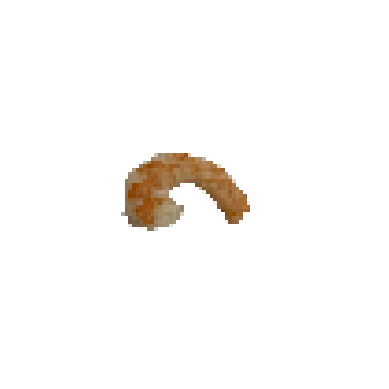

In [101]:
image = "Adam test imgs/shrimp.png"

preprocessed_image = load_and_preprocess_image(image)
plt.imshow(np.squeeze(preprocessed_image))
plt.axis('off')
plt.show()

In [102]:
prediction = lr_dropout_model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction, axis=-1)[0]
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class index: 36


In [103]:
predicted_class_label = get_class_label(predicted_class_index, train_generator.class_indices)
print("Predicted class label:", predicted_class_label)

Predicted class label: Corn Husk


*Maybe its because shrimp isnt in the training set ¯\\\_(ツ)_/¯*

---

In [106]:
def create_improved_model(input_shape, number_of_classes):
    model = Sequential([
        Conv2D(16, (2, 2), padding='same', input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size=2),
        Conv2D(32, (2, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=2),
        Conv2D(64, (2, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=2),
        Conv2D(128, (2, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(150, activation='relu'),
        Dropout(0.4),
        Dense(number_of_classes, activation='softmax')
    ])
    return model

In [107]:
model = create_improved_model(input_shape=(100, 100, 3), number_of_classes=number_of_class)  
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
print("\nBatch Normalization Model Summary:")
model.summary()


Batch Normalization Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 100, 100, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 150)            │       691,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 131)            │        19,781 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,509,144 (5.76 MB)

 Trainable params: 754,571 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 754,573 (2.88 MB)

In [108]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [110]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(100, 100),  # Ensure the target size is the same as `input_shape`
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [111]:
history = model.fit(
    train_generator,
    steps_per_epoch=1600 // 32, 
    epochs=30,  
    validation_data=test_generator,
    validation_steps=800 // 32  
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 405ms/step - accuracy: 0.0100 - loss: 4.8697 - val_accuracy: 0.0188 - val_loss: 4.8105
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 363ms/step - accuracy: 0.0201 - loss: 4.7297 - val_accuracy: 0.0463 - val_loss: 4.3688
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 361ms/step - accuracy: 0.0442 - loss: 4.4008 - val_accuracy: 0.1187 - val_loss: 3.7958
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 333ms/step - accuracy: 0.0830 - loss: 3.9222 - val_accuracy: 0.1750 - val_loss: 3.5075
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.1137 - loss: 3.6508 - val_accuracy: 0.2788 - val_loss: 3.0553
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step - accuracy: 0.1511 - loss: 3.3337 - val_accuracy: 0.3438 - val_loss: 2.6870
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - accuracy: 0.1811 - loss: 3.0400 - val_accuracy: 0.4162 - val_loss: 2.3219
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.2497 - loss: 2.7689 - val_accu

In [112]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

709/709 ━━━━━━━━━━━━━━━━━━━━ 108s 152ms/step - accuracy: 0.8441 - loss: 0.5282
Test Accuracy: 0.8421191573143005
Test Loss: 0.5355644226074219


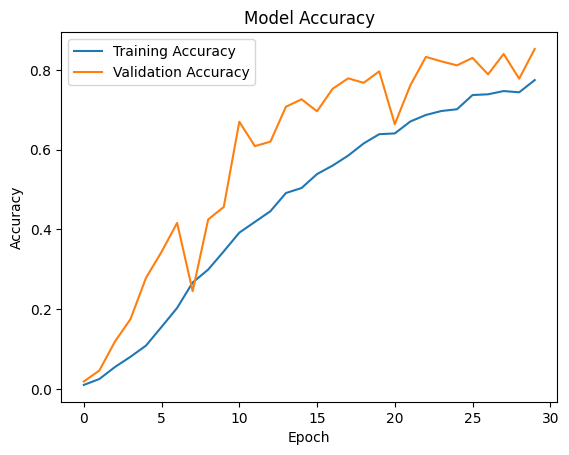

In [114]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

---

Redo Preprocessing

we restarting 🙏

In [119]:
from sklearn.datasets import load_files

train_dir = 'fruits-360_dataset/fruits-360/Training/'
test_dir = 'fruits-360_dataset/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

In [132]:
from tensorflow.keras.utils import to_categorical

no_of_classes = len(np.unique(y_train))

y_train = to_categorical(y_train, num_classes=no_of_classes)
y_test = to_categorical(y_test, num_classes=no_of_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [134]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_valid = y_test[7000:],y_test[:7000]
print('Valiation X : ',x_valid.shape)
print('Validation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


In [135]:
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [136]:
# Tryna reduce training time 
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

**Now lets try this again**

In [137]:
def tensorflow_based_model():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, input_shape=(100, 100, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Dropout(0.3))
    model.add(Flatten())
    
    model.add(Dense(150))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(no_of_classes, activation='softmax'))
    
    return model

In [138]:
model = tensorflow_based_model() 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [139]:
bn_model = create_bn_model()
lr_dropout_model = create_lr_dropout_model()
print("\nBatch Normalization Model Summary:")
bn_model.summary()


Batch Normalization Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 131)            │       134,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,336,643 (50.88 MB)

 Trainable params: 13,336,195 (50.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [140]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_valid),
        verbose=2, shuffle=True)

Epoch 1/30
2116/2116 - 112s - 53ms/step - accuracy: 0.7025 - loss: 1.0969 - val_accuracy: 0.8886 - val_loss: 0.3891
Epoch 2/30
2116/2116 - 100s - 47ms/step - accuracy: 0.9535 - loss: 0.1405 - val_accuracy: 0.9563 - val_loss: 0.1892
Epoch 3/30
2116/2116 - 93s - 44ms/step - accuracy: 0.9714 - loss: 0.0886 - val_accuracy: 0.9713 - val_loss: 0.1428
Epoch 4/30
2116/2116 - 82s - 39ms/step - accuracy: 0.9784 - loss: 0.0689 - val_accuracy: 0.9694 - val_loss: 0.1639
Epoch 5/30
2116/2116 - 96s - 45ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9596 - val_loss: 0.2677
Epoch 6/30
2116/2116 - 90s - 42ms/step - accuracy: 0.9849 - loss: 0.0523 - val_accuracy: 0.9801 - val_loss: 0.1432
Epoch 7/30
2116/2116 - 93s - 44ms/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 0.9741 - val_loss: 0.1606
Epoch 8/30
2116/2116 - 91s - 43ms/step - accuracy: 0.9874 - loss: 0.0443 - val_accuracy: 0.9764 - val_loss: 0.1948
Epoch 9/30
2116/2116 - 88s - 41ms/step - accuracy: 0.9890 - loss: 0.0404 - val

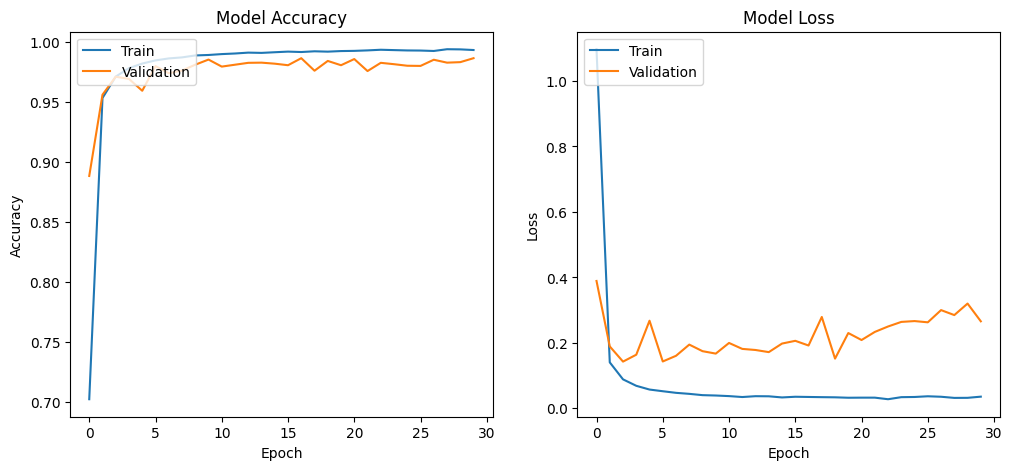

In [142]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [154]:
acc_score = model.evaluate(x_test, y_test) 
print("Test Loss:", acc_score[0])
print("Test Accuracy:", acc_score[1])

491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9876 - loss: 0.2267
Test Loss: 0.24676187336444855
Test Accuracy: 0.9871239066123962
